<a href="https://colab.research.google.com/github/Sushil156/Loan-Repayment-Prediction/blob/main/Python_Code_Loan_Repay_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import train_test_split
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import pickle
import gc
import lightgbm as lgb

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# LOAD DATASETS

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/Data/application_train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Data/application_test.csv')
bureau_bal = pd.read_csv('/content/gdrive/MyDrive/Data/bureau_balance.csv')
bureau = pd.read_csv('/content/gdrive/MyDrive/Data/bureau.csv')
credit_card_bal = pd.read_csv('/content/gdrive/MyDrive/Data/credit_card_balance.csv')
installments_payments = pd.read_csv('/content/gdrive/MyDrive/Data/installments_payments.csv')
previous_application = pd.read_csv('/content/gdrive/MyDrive/Data/previous_application.csv')
pos_cash_balance = pd.read_csv('/content/gdrive/MyDrive/Data/POS_CASH_balance.csv')

In [ ]:
train.shape, test.shape, bureau_bal.shape, bureau.shape, credit_card_bal.shape, installments_payments.shape, previous_application.shape, pos_cash_balance.shape

((307511, 122),
 (48744, 121),
 (27299925, 3),
 (1716428, 17),
 (3840312, 23),
 (13605401, 8),
 (1670214, 37),
 (10001358, 8))

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None,'display.max_colwidth', None)

In [ ]:
#Check NAs for individual columns 
bureau.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [ ]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [ ]:
bureau.shape

(1716428, 17)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
#Info for all other datasets 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
#Check NAs for any dataset 
previous_application.isnull().sum(axis = 0)

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [ ]:
previous_application.shape

(1670214, 37)

In [ ]:
#Check NA number for individual coulumns in respective dataset
installments_payments['DAYS_ENTRY_PAYMENT'].isna().sum()

2905

In [ ]:
pos_cash_balance.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

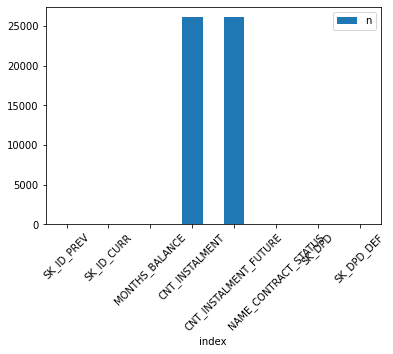

In [ ]:
#Visualization to check NAs of each dataset 
pos_cash_balance.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [ ]:
def missing_values(df):
    n_miss_val = df.isnull().sum()
    n_miss_per = 100 * df.isnull().sum() / len(df)
    miss_tbl = pd.concat([n_miss_val,n_miss_per],axis=1).sort_values(1,ascending=False).round(1)
    miss_tbl = miss_tbl[miss_tbl[1] !=0]
    
    miss_tbl = miss_tbl.rename(columns ={0: 'Missing Values',1:'%(Percentage) Missing Values'})
    print("{} columns that have missing values.".format(miss_tbl.shape[0]))
    
    return miss_tbl

In [ ]:
#Check Missing Values of each dataset 
missing_values_table = missing_values(train)
missing_values_table

64 columns that have missing values.


,Missing Values,%(Percentage) Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


In [ ]:
train.shape

(307511, 122)

In [ ]:
pos_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [ ]:
print('Training data contains {} rows and {} columns '.format(train.shape[0],train.shape[1]))
print('Test data contains {} rows and {} columns '.format(test.shape[0],test.shape[1]))

Training data contains 307511 rows and 122 columns 
Test data contains 48744 rows and 121 columns 


([<matplotlib.axis.XTick at 0x7ff6e234f050>,
 <a list of 3 Text major ticklabel objects>)

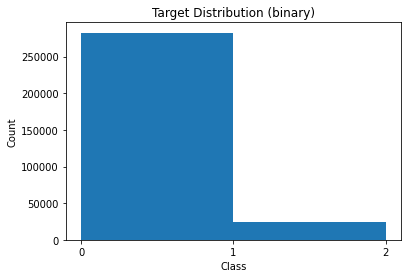

In [ ]:
plt.hist(train['TARGET'], bins=[0,1,2])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Target Distribution (binary)')

plt.xticks([0,1,2])

We can see that in our TARGET coulumn there are 282,686 people who have not defaulted on loan and 24,825 people who have defaulted on loan 

0 -> Represents people who have paid their loan 

1 -> Represents people who habe not paid their loan

In [ ]:
#Explore each columns' unique values ' ' in respective datasets 
installments_payments['DAYS_ENTRY_PAYMENT'].head(50)

0    -1187.0
1    -2156.0
2      -63.0
3    -2426.0
4    -1366.0
5    -1417.0
6     -352.0
7     -994.0
8     -197.0
9     -609.0
10    -937.0
11   -1269.0
12    -761.0
13    -800.0
14   -1153.0
15   -2619.0
16    -503.0
17   -1048.0
18   -1693.0
19   -1693.0
20    -365.0
21     -59.0
22   -1282.0
23    -322.0
24    -286.0
25    -255.0
26    -356.0
27   -2561.0
28    -155.0
29   -1895.0
30    -474.0
31   -2807.0
32    -356.0
33   -1172.0
34    -548.0
35    -174.0
36    -190.0
37    -185.0
38   -1219.0
39    -332.0
40   -2046.0
41    -832.0
42    -217.0
43   -1860.0
44   -2068.0
45   -2101.0
46    -810.0
47   -1379.0
48   -2555.0
49    -190.0
Name: DAYS_ENTRY_PAYMENT, dtype: float64

Text(0.5, 1.0, 'Distribution of Income')

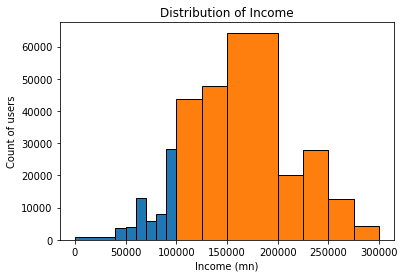

In [ ]:
bins = [0, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
bins1 = [100000, 125000, 150000, 200000, 225000, 250000, 275000, 300000]
plt.hist(train['AMT_INCOME_TOTAL'], bins = bins, edgecolor = 'black')
plt.hist(train['AMT_INCOME_TOTAL'], bins = bins1, edgecolor = 'black')
plt.xlabel('Income (mn)')
plt.ylabel('Count of users')
plt.title('Distribution of Income')

In [ ]:
(train[train['AMT_INCOME_TOTAL'] < 100000]['TARGET'].value_counts())/len(train[train['AMT_INCOME_TOTAL'] < 100000])*100


0    91.797231
1     8.202769
Name: TARGET, dtype: float64

In [ ]:
(train[train['AMT_INCOME_TOTAL'] > 300000]['TARGET'].value_counts())/len(train[train['AMT_INCOME_TOTAL'] > 300000])*100


0    94.04987
1     5.95013
Name: TARGET, dtype: float64

**We can see than users with income (>300000) have higher chance of paying the loan vs users with (<100000)**

Text(0.5, 1.0, 'Distribution of Income')

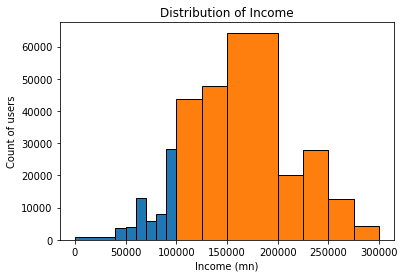

In [ ]:
bins = [0, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
bins1 = [100000, 125000, 150000, 200000, 225000, 250000, 275000, 300000]
plt.hist(train['AMT_INCOME_TOTAL'], bins = bins, edgecolor = 'black')
plt.hist(train['AMT_INCOME_TOTAL'], bins = bins1, edgecolor = 'black')
plt.xlabel('Income (mn)')
plt.ylabel('Count of users')
plt.title('Distribution of Income')

In [ ]:
train['AMT_CREDIT'].head(15)

0      406597.5
1     1293502.5
2      135000.0
3      312682.5
4      513000.0
5      490495.5
6     1560726.0
7     1530000.0
8     1019610.0
9      405000.0
10     652500.0
11     148365.0
12      80865.0
13     918468.0
14     773680.5
Name: AMT_CREDIT, dtype: float64

In [ ]:
(train[train['AMT_CREDIT'] < 100000]['TARGET'].value_counts())/len(train[train['AMT_CREDIT'] < 100000])*100


0    94.487009
1     5.512991
Name: TARGET, dtype: float64

In [ ]:
(train[train['AMT_CREDIT'] > 100000]['TARGET'].value_counts())/len(train[train['AMT_CREDIT'] > 100000])*100


0    91.876142
1     8.123858
Name: TARGET, dtype: float64

Text(0.5, 1.0, 'Distribution of Credit Amount')

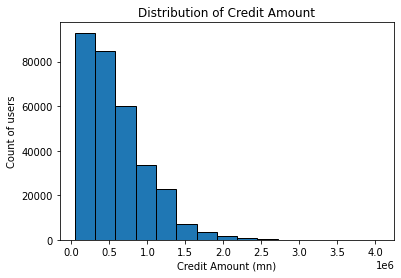

In [ ]:
plt.hist(train['AMT_CREDIT'], edgecolor = 'black', bins = 15)
plt.xlabel('Credit Amount (mn)')
plt.ylabel('Count of users')
plt.title('Distribution of Credit Amount')

In [ ]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
#Make a Copy of Training Set
train_copy = train.copy()

In [ ]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
train_copy['LOG_AMT_CREDIT'] = np.log(train_copy['AMT_CREDIT'])

Text(0.5, 1.0, 'Distribution of log(Credit Amount)')

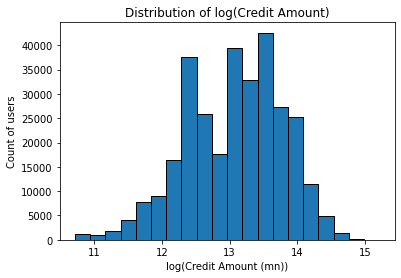

In [ ]:
plt.hist(train_copy['LOG_AMT_CREDIT'], edgecolor = 'black', bins = 20)
plt.xlabel('log(Credit Amount (mn))')
plt.ylabel('Count of users')
plt.title('Distribution of log(Credit Amount)')

In [ ]:
train_copy['LOG_AMT_INCOME_TOTAL'] = np.log(train_copy['AMT_INCOME_TOTAL'])

Text(0.5, 1.0, 'Distribution of log(Income)')

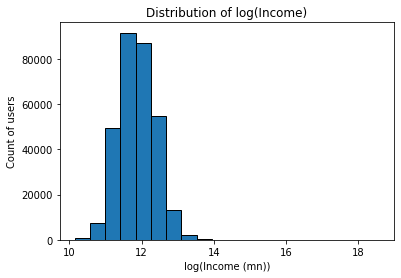

In [ ]:
plt.hist(train_copy['LOG_AMT_INCOME_TOTAL'], edgecolor = 'black', bins = 20)
plt.xlabel('log(Income (mn))')
plt.ylabel('Count of users')
plt.title('Distribution of log(Income)')

Text(0.5, 1.0, 'Distribution of loan type')

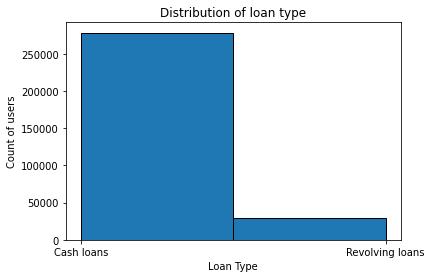

In [ ]:
plt.hist(train_copy['NAME_CONTRACT_TYPE'], edgecolor = 'black', bins = 2)
plt.xlabel('Loan Type')
plt.ylabel('Count of users')
plt.title('Distribution of loan type')

**We can see from the above graph that more than 90% of loans are of "Cash loans' and rest is 'Revolving loans'**

In [ ]:
(train[train['NAME_CONTRACT_TYPE'] == 'Cash loans']['TARGET'].value_counts())/len(train[train['NAME_CONTRACT_TYPE'] == 'Cash loans'])*100


0    91.654087
1     8.345913
Name: TARGET, dtype: float64

In [ ]:
(train[train['NAME_CONTRACT_TYPE'] == 'Revolving loans']['TARGET'].value_counts())/len(train[train['NAME_CONTRACT_TYPE'] == 'Revolving loans'])*100


0    94.521671
1     5.478329
Name: TARGET, dtype: float64

In [ ]:
(train[train['NAME_CONTRACT_TYPE'] == 'Revolving loans']['TARGET'].value_counts())

0    27675
1     1604
Name: TARGET, dtype: int64

In [ ]:
(train[train['NAME_CONTRACT_TYPE'] == 'Cash loans']['TARGET'].value_counts())

0    255011
1     23221
Name: TARGET, dtype: int64

In [ ]:
print(list(train))

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

Text(0.5, 1.0, 'Distribution of car ownership')

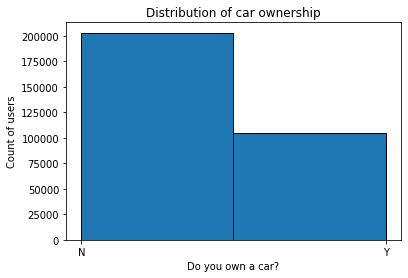

In [ ]:
plt.hist(train_copy['FLAG_OWN_CAR'], edgecolor = 'black', bins = 2)
plt.xlabel('Do you own a car?')
plt.ylabel('Count of users')
plt.title('Distribution of car ownership')

In [ ]:
(train_copy[train_copy['FLAG_OWN_CAR'] == 'Y']['TARGET'].value_counts())/len(train[train['FLAG_OWN_CAR'] == 'Y'])*100


0    92.75627
1     7.24373
Name: TARGET, dtype: float64

In [ ]:
(train_copy[train_copy['FLAG_OWN_CAR'] == 'N']['TARGET'].value_counts())/len(train[train['FLAG_OWN_CAR'] == 'N'])*100


0    91.499773
1     8.500227
Name: TARGET, dtype: float64

## IF you dont own a car then percentage of default in terms of absolute number increases by 17% 

Text(0.5, 1.0, 'Distribution of house ownership')

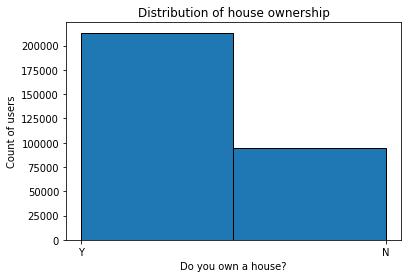

In [ ]:
plt.hist(train_copy['FLAG_OWN_REALTY'], edgecolor = 'black', bins = 2)
plt.xlabel('Do you own a house?')
plt.ylabel('Count of users')
plt.title('Distribution of house ownership')

In [ ]:
(train_copy[train_copy['FLAG_OWN_REALTY'] == 'Y']['TARGET'].value_counts())/len(train[train['FLAG_OWN_REALTY'] == 'Y'])*100

0    92.038423
1     7.961577
Name: TARGET, dtype: float64

In [ ]:
(train_copy[train_copy['FLAG_OWN_REALTY'] == 'N']['TARGET'].value_counts())/len(train[train['FLAG_OWN_REALTY'] == 'N'])*100

0    91.675071
1     8.324929
Name: TARGET, dtype: float64

IF you dont own a realty then percentage of default in terms of absolute number increases by 5% 

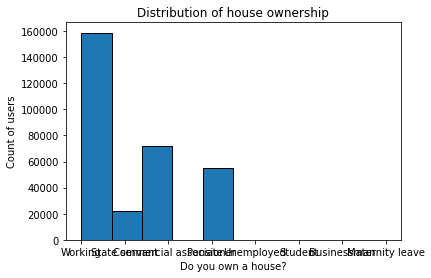

In [ ]:
plt.hist(train_copy['NAME_INCOME_TYPE'], edgecolor = 'black')
plt.xlabel('Do you own a house?')
plt.ylabel('Count of users')
plt.title('Distribution of house ownership')
plt.show()

In [ ]:
#Get unique values of a particular column 
pd.unique(train_copy['NAME_INCOME_TYPE'])

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [ ]:
train_copy.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

(array([1.58774e+05, 2.17030e+04, 7.16170e+04, 0.00000e+00, 5.53620e+04,
        2.20000e+01, 0.00000e+00, 1.80000e+01, 1.00000e+01, 5.00000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

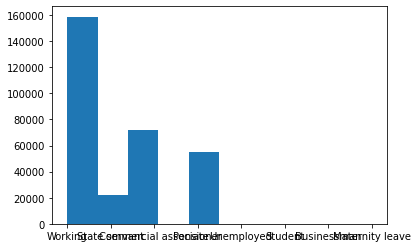

In [ ]:
plt.hist(train_copy['NAME_INCOME_TYPE'])

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Working']['TARGET'].value_counts())/len(train[train['NAME_INCOME_TYPE'] == 'Working'])*100

0    90.411528
1     9.588472
Name: TARGET, dtype: float64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Working']['TARGET'].value_counts())

0    143550
1     15224
Name: TARGET, dtype: int64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'State servant']['TARGET'].value_counts())/len(train[train['NAME_INCOME_TYPE'] == 'State servant'])*100

0    94.245035
1     5.754965
Name: TARGET, dtype: float64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'State servant']['TARGET'].value_counts())

0    20454
1     1249
Name: TARGET, dtype: int64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'State servant']['TARGET'].value_counts())

0    20454
1     1249
Name: TARGET, dtype: int64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Commercial associate']['TARGET'].value_counts())/len(train[train['NAME_INCOME_TYPE'] == 'Commercial associate'])*100

0    92.515743
1     7.484257
Name: TARGET, dtype: float64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Commercial associate']['TARGET'].value_counts())

0    66257
1     5360
Name: TARGET, dtype: int64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Pensioner']['TARGET'].value_counts())/len(train[train['NAME_INCOME_TYPE'] == 'Pensioner'])*100

0    94.613634
1     5.386366
Name: TARGET, dtype: float64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Pensioner']['TARGET'].value_counts())

0    52380
1     2982
Name: TARGET, dtype: int64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Unemployed']['TARGET'].value_counts())/len(train[train['NAME_INCOME_TYPE'] == 'Unemployed'])*100

0    63.636364
1    36.363636
Name: TARGET, dtype: float64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Unemployed']['TARGET'].value_counts())

0    14
1     8
Name: TARGET, dtype: int64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Student']['TARGET'].value_counts())/len(train[train['NAME_INCOME_TYPE'] == 'Student'])*100

0    100.0
Name: TARGET, dtype: float64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Student']['TARGET'].value_counts())

0    18
Name: TARGET, dtype: int64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Businessman']['TARGET'].value_counts())/len(train[train['NAME_INCOME_TYPE'] == 'Businessman'])*100

0    100.0
Name: TARGET, dtype: float64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Businessman']['TARGET'].value_counts())

0    10
Name: TARGET, dtype: int64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Maternity leave']['TARGET'].value_counts())/len(train[train['NAME_INCOME_TYPE'] == 'Maternity leave'])*100

0    60.0
1    40.0
Name: TARGET, dtype: float64

In [ ]:
(train_copy[train_copy['NAME_INCOME_TYPE'] == 'Maternity leave']['TARGET'].value_counts())

0    3
1    2
Name: TARGET, dtype: int64

We can see from the graph that: 
- Roughly 50% of the loans are given to "Working" income type and this category has 10% highest default rate 
- The teo categories with bulk income type ~ Commercial Associates and Pensioners have much lesser 7% and 5% default rate 
- All students and businessman are paying the loan (however the sample size is extremely low) to deduce any conclusion on this category 
- Because of this we believe that this variable is one of the most imp ones as it doesnt have any missing values too 

In [ ]:
#Distribution of client age
train_copy['DAYS_BIRTH'].head(25)

0     -9461
1    -16765
2    -19046
3    -19005
4    -19932
5    -16941
6    -13778
7    -18850
8    -20099
9    -14469
10   -10197
11   -20417
12   -13439
13   -14086
14   -14583
15    -8728
16   -12931
17    -9776
18   -17718
19   -11348
20   -18252
21   -14815
22   -11146
23   -24827
24   -11286
Name: DAYS_BIRTH, dtype: int64

Text(0, 0.5, 'Count')

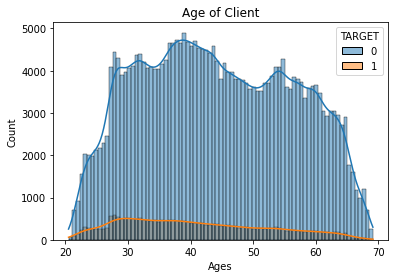

In [ ]:
sns.histplot(train_copy,x=abs(train_copy['DAYS_BIRTH']/365),hue="TARGET",color="g",kde=True);
plt.title('Age of Client')
plt.xlabel('Ages');
plt.ylabel('Count')

In [ ]:
train_copy.shape

(307511, 124)

In [ ]:
train_copy['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694])

In [ ]:
train_copy['AGE'] = train_copy['DAYS_BIRTH']/(-365)

In [ ]:
train_copy['AGE'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: AGE, dtype: float64

In [ ]:
#Drop Day_Birth
train_copy.drop(columns = ['DAYS_BIRTH'], inplace = True)

In [ ]:
train_copy['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
train_copy['DAYS_EMPLOYED'].head()

0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
#Count of unique values in a column 
train_copy['DAYS_EMPLOYED'].nunique()

12574

In [ ]:
# pd.value_counts(train_copy.DAYS_EMPLOYED) 
# We can see that 55374 values are numbered as positive "365243" which we shall replace with NAN 

In [ ]:
incorrect_Days_Emp = train_copy['DAYS_EMPLOYED']

In [ ]:
train_copy['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [ ]:
train_copy.shape

(307511, 124)

In [ ]:
train_copy['DAYS_EMP_BEFORE_APP'] = train_copy['DAYS_EMPLOYED']/(-365)

In [ ]:
#Drop Days_Employed
train_copy.drop(columns = ['DAYS_EMPLOYED'], inplace = True)


In [ ]:
train_copy['DAYS_EMP_BEFORE_APP'].head(30)

0      1.745205
1      3.254795
2      0.616438
3      8.326027
4      8.323288
5      4.350685
6      8.575342
7      1.230137
8           NaN
9      5.531507
10     1.860274
11          NaN
12     7.443836
13     8.295890
14     0.556164
15     3.169863
16     3.608219
17     0.523288
18    21.380822
19     5.583562
20    11.742466
21     4.526027
22    11.797260
23          NaN
24     2.043836
25     9.572603
26     7.200000
27     3.380822
28     4.920548
29     2.767123
Name: DAYS_EMP_BEFORE_APP, dtype: float64

In [ ]:
train_copy['DAYS_EMP_BEFORE_APP'].describe()

count    252137.000000
mean          6.531971
std           6.406466
min          -0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMP_BEFORE_APP, dtype: float64

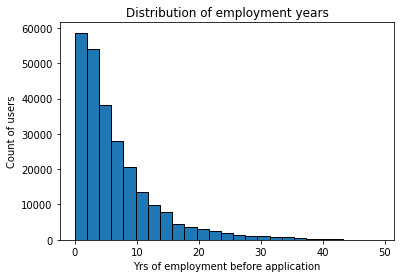

In [ ]:
plt.hist(train_copy['DAYS_EMP_BEFORE_APP'], edgecolor = 'black', bins = 25)
plt.xlabel('Yrs of employment before application')
plt.ylabel('Count of users')
plt.title('Distribution of employment years')
plt.show()

In [ ]:
#Checking missing values for train_copy


def missing_values(df_copy):
    n_miss_val_copy = df_copy.isnull().sum()
    n_miss_per_copy = 100 * df_copy.isnull().sum() / len(df_copy)
    miss_tbl_copy = pd.concat([n_miss_val_copy,n_miss_per_copy],axis=1).sort_values(1,ascending=False).round(1)
    miss_tbl_copy = miss_tbl_copy[miss_tbl_copy[1] !=0]
    
    miss_tbl_copy = miss_tbl_copy.rename(columns ={0: 'Missing Values',1:'%(Percentage) Missing Values'})
    print("{} columns that have missing values.".format(miss_tbl_copy.shape[0]))
    
    return miss_tbl_copy

In [ ]:
#Check Missing Values of each dataset in train_copy
missing_values_table_copy = missing_values(train_copy)
missing_values_table_copy

65 columns that have missing values.


,Missing Values,%(Percentage) Missing Values
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


In [ ]:
type(missing_values_table_copy)

pandas.core.frame.DataFrame

In [ ]:
print(missing_values_table_copy.columns)

Index(['Missing Values', '%(Percentage) Missing Values'], dtype='object')


In [ ]:
print(train_copy.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'LOG_AMT_CREDIT', 'LOG_AMT_INCOME_TOTAL', 'AGE', 'DAYS_EMP_BEFORE_APP'],
      dtype='object', length=124)


In [ ]:
type(train_copy)

pandas.core.frame.DataFrame

In [ ]:
#Drop all missing values from "train_copy" and fit baseline model 

train_copy.drop(columns = ['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 
'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 
'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 
'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 
'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 
'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'EXT_SOURCE_3', 
'DAYS_EMP_BEFORE_APP', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_TYPE_SUITE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2','AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'], inplace = True)

In [ ]:
train_copy.shape

(307511, 56)

In [ ]:
train_copy.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_N

In [ ]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [ ]:
train_copy.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_N

In [ ]:
train_copy.drop(columns = ['LOG_AMT_CREDIT', 'LOG_AMT_INCOME_TOTAL'], inplace = True)

In [ ]:
train_copy.shape

(307511, 54)

In [ ]:
train_copy.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,1,1,0,1,1,0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-4260.0,-2531,1,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.180822
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-9833.0,-2437,1,1,0,1,0,0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.068493
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-4311.0,-3458,1,1,0,1,0,0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,54.608219


In [ ]:
#Encoding on Categorical variable to fit baseline model 
def categorical_features(df_cat):
    categorical_cols = df_cat.select_dtypes(include=["object"]).columns.tolist()
    types=df_cat[categorical_cols].dtypes
    uniques = df_cat[categorical_cols].nunique()
    categorical_tbl = pd.concat([uniques,types],axis=1).sort_values(0,ascending=False).rename(columns = {0:'Unique Values',1:'Data Types'})
    print("The dataset contains {} categorical values".format(df_cat[categorical_cols].shape[1]))
    
    return categorical_tbl 

In [ ]:
categorical_features(train_copy)

The dataset contains 10 categorical values


,Unique Values,Data Types
ORGANIZATION_TYPE,58,object
NAME_INCOME_TYPE,8,object
WEEKDAY_APPR_PROCESS_START,7,object
NAME_FAMILY_STATUS,6,object
NAME_HOUSING_TYPE,6,object
NAME_EDUCATION_TYPE,5,object
CODE_GENDER,3,object
NAME_CONTRACT_TYPE,2,object
FLAG_OWN_CAR,2,object
FLAG_OWN_REALTY,2,object


From above we will pick the categorical variables and encode as follows: 

1) Use Label Encoding for any categorical variables with only 2 categories 

2) One-Hot Encoding for any categorical variables with more than 2 categories. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = train_copy.select_dtypes(include=["object"])
for col in categorical_cols:
    if len(list(categorical_cols[col].unique())) <=2:
            le.fit(train_copy[col])
            train_copy[col] = le.transform(train_copy[col])

In [ ]:
train_copy = pd.get_dummies(train_copy)

In [ ]:
print('Train data : ', train_copy.shape)

Train data :  (307511, 140)


In [ ]:
train_copy.dtypes

SK_ID_CURR                                             int64
TARGET                                                 int64
NAME_CONTRACT_TYPE                                     int64
FLAG_OWN_CAR                                           int64
FLAG_OWN_REALTY                                        int64
CNT_CHILDREN                                           int64
AMT_INCOME_TOTAL                                     float64
AMT_CREDIT                                           float64
REGION_POPULATION_RELATIVE                           float64
DAYS_REGISTRATION                                    float64
DAYS_ID_PUBLISH                                        int64
FLAG_MOBIL                                             int64
FLAG_EMP_PHONE                                         int64
FLAG_WORK_PHONE                                        int64
FLAG_CONT_MOBILE                                       int64
FLAG_PHONE                                             int64
FLAG_EMAIL              

In [ ]:
X = train_copy.drop('TARGET', axis=1)
y = train_copy['TARGET'] 

In [ ]:
X.shape, train_copy.shape

((307511, 139), (307511, 140))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     70687
           1       0.11      0.13      0.12      6191

    accuracy                           0.85     76878
   macro avg       0.52      0.52      0.52     76878
weighted avg       0.86      0.85      0.85     76878



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X, y)

DecisionTreeClassifier()

In [ ]:
#KFold CV on baseline model
def kfold_(dtc_, X_, y_):
    cv = KFold(n_splits=5, random_state=50, shuffle=True)


    scoring = {'accuracy' : make_scorer(accuracy_score), 'precision' : make_scorer(precision_score),'recall' : make_scorer(recall_score),'f1_score' : make_scorer(f1_score)}

    # Model Evaluation
    scores = cross_validate(dtc_, X_, y_, scoring=scoring, cv=cv)

    # Model Scores
    for k,v in scores.items():
        print('Mean', k,':',' %.3f (%.3f)' % (np.mean(scores[k]), np.std(scores[k])))

In [ ]:
kfold_(dtc,X,y)

Mean fit_time :  11.318 (0.143)
Mean score_time :  0.134 (0.002)
Mean test_accuracy :  0.845 (0.001)
Mean test_precision :  0.107 (0.006)
Mean test_recall :  0.126 (0.007)
Mean test_f1_score :  0.116 (0.006)


We used DTC for our baseline model and it performed poorly on all metrics F1, Precision and recall of 11 to 12 percent. 

In [ ]:
#Logging two variables "AMT_CREDIT" & "AMT_INCOME_TOTAL" and then checking improvement in score
train_copy['LOG_AMT_CREDIT'] = np.log(train_copy['AMT_CREDIT'])
train_copy['LOG_AMT_INCOME_TOTAL'] = np.log(train_copy['AMT_INCOME_TOTAL'])

#After logging drop "AMT_CREDIT" & "AMT_INCOME_TOTAL"
train_copy.drop(columns = ['AMT_CREDIT', 'AMT_INCOME_TOTAL'], inplace = True)

In [ ]:
train_copy.dtypes

SK_ID_CURR                                             int64
TARGET                                                 int64
NAME_CONTRACT_TYPE                                     int64
FLAG_OWN_CAR                                           int64
FLAG_OWN_REALTY                                        int64
CNT_CHILDREN                                           int64
REGION_POPULATION_RELATIVE                           float64
DAYS_REGISTRATION                                    float64
DAYS_ID_PUBLISH                                        int64
FLAG_MOBIL                                             int64
FLAG_EMP_PHONE                                         int64
FLAG_WORK_PHONE                                        int64
FLAG_CONT_MOBILE                                       int64
FLAG_PHONE                                             int64
FLAG_EMAIL                                             int64
REGION_RATING_CLIENT                                   int64
REGION_RATING_CLIENT_W_C

In [ ]:
train_copy.shape

(307511, 140)

In [ ]:
train_copy['YEARS_EMP_BEFORE_APP'] = train['DAYS_EMPLOYED']

In [ ]:
train_copy['YEARS_EMP_BEFORE_APP'].replace({365243: np.nan}, inplace = True)

In [ ]:
train_copy['YEARS_EMP_BEFORE_APP'] = train_copy['YEARS_EMP_BEFORE_APP']/(-365)

In [ ]:
train_copy['YEARS_EMP_BEFORE_APP'].head()

0    1.745205
1    3.254795
2    0.616438
3    8.326027
4    8.323288
Name: YEARS_EMP_BEFORE_APP, dtype: float64

In [ ]:
(train_copy[train_copy['YEARS_EMP_BEFORE_APP'] > 2]['TARGET'].value_counts())/len(train_copy[train_copy['YEARS_EMP_BEFORE_APP'] > 2])*100


0    92.130934
1     7.869066
Name: TARGET, dtype: float64

In [ ]:
(train_copy[train_copy['YEARS_EMP_BEFORE_APP'] > 5]['TARGET'].value_counts())/len(train_copy[train_copy['YEARS_EMP_BEFORE_APP'] > 5])*100


0    93.589522
1     6.410478
Name: TARGET, dtype: float64

In [ ]:
(train_copy[train_copy['YEARS_EMP_BEFORE_APP'] < 2]['TARGET'].value_counts())/len(train_copy[train_copy['YEARS_EMP_BEFORE_APP'] < 2])*100


0    88.792368
1    11.207632
Name: TARGET, dtype: float64

**In terms of number of years of experience before applying for the application - it is witnessed that users with less than 2 years of employment default more than 42% compared to users with more than 5 years of employment in the current job while making the application**

add_old = train['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_TYPE_SUITE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2','AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

In [ ]:
#Add only those columns which has less than 40% data missing 
train_copy['OCCUPATION_TYPE'] = train['OCCUPATION_TYPE']
train_copy['EXT_SOURCE_3'] = train['EXT_SOURCE_3']
train_copy['AMT_REQ_CREDIT_BUREAU_YEAR'] = train['AMT_REQ_CREDIT_BUREAU_YEAR']
train_copy['AMT_REQ_CREDIT_BUREAU_QRT'] = train['AMT_REQ_CREDIT_BUREAU_QRT']
train_copy['AMT_REQ_CREDIT_BUREAU_MON'] = train['AMT_REQ_CREDIT_BUREAU_MON']
train_copy['NAME_TYPE_SUITE'] = train['NAME_TYPE_SUITE']
train_copy['DEF_30_CNT_SOCIAL_CIRCLE'] = train['DEF_30_CNT_SOCIAL_CIRCLE']
train_copy['OBS_60_CNT_SOCIAL_CIRCLE'] = train['OBS_60_CNT_SOCIAL_CIRCLE']
train_copy['OBS_30_CNT_SOCIAL_CIRCLE'] = train['OBS_30_CNT_SOCIAL_CIRCLE']
train_copy['DEF_60_CNT_SOCIAL_CIRCLE'] = train['DEF_60_CNT_SOCIAL_CIRCLE']
train_copy['EXT_SOURCE_2'] = train['EXT_SOURCE_2']
train_copy['AMT_GOODS_PRICE'] = train['AMT_GOODS_PRICE']
train_copy['AMT_ANNUITY'] = train['AMT_ANNUITY']
train_copy['CNT_FAM_MEMBERS'] = train['CNT_FAM_MEMBERS']
train_copy['DAYS_LAST_PHONE_CHANGE'] = train['DAYS_LAST_PHONE_CHANGE']

In [ ]:
train_copy.shape

(307511, 156)

In [ ]:
train_copy['AMT_ANNUITY'].isna().sum()

12

## Feature Engineering ## 

##### 1) YEARS_EMP_BEFORE_APP

##### 2) ANNUITY_TO_INC_PERCENT

##### 3) Log - LOG_AMT_CREDIT & LOG_AMT_INCOME_TOTAL 

##### 4) Income by Age

##### 5) HOUSEHOLD_INC_PER_PERSON 

##### 6) Age

In [ ]:
train_copy.dtypes

SK_ID_CURR                                             int64
TARGET                                                 int64
NAME_CONTRACT_TYPE                                     int64
FLAG_OWN_CAR                                           int64
FLAG_OWN_REALTY                                        int64
CNT_CHILDREN                                           int64
REGION_POPULATION_RELATIVE                           float64
DAYS_REGISTRATION                                    float64
DAYS_ID_PUBLISH                                        int64
FLAG_MOBIL                                             int64
FLAG_EMP_PHONE                                         int64
FLAG_WORK_PHONE                                        int64
FLAG_CONT_MOBILE                                       int64
FLAG_PHONE                                             int64
FLAG_EMAIL                                             int64
REGION_RATING_CLIENT                                   int64
REGION_RATING_CLIENT_W_C

In [ ]:
#Feature No. 1 Annuity to Income percentage of each user 
train_copy['AMT_INCOME_TOTAL'] = train['AMT_INCOME_TOTAL']
train_copy['ANNUITY_TO_INC_PERCENT'] = train_copy['AMT_ANNUITY'] / train_copy['AMT_INCOME_TOTAL']

#Feature No. 2 Income to Credit percentage 
train_copy['AMT_CREDIT'] = train['AMT_CREDIT']
train_copy['INCOME_TO_CREDIT_PERCENT'] = train_copy['AMT_INCOME_TOTAL'] / train_copy['AMT_CREDIT']*100 

#Feature No. 3 Income by Age 
train_copy['IMCOME_BY_AGE'] = train['AMT_INCOME_TOTAL'] / train_copy['AGE'] 

#Feature NO. 4 Household income per person 
train_copy['HOUSEHOLD_INC_PER_PERSON'] = train_copy['AMT_INCOME_TOTAL'] / train_copy['CNT_FAM_MEMBERS']


In [ ]:
train_copy.shape

(307511, 162)

## Exploring Bureau Dataset and Merging it through SK_ID_CURR 

In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
bureau.shape

(1716428, 17)

In [ ]:
bureau.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [ ]:
#Merging numerical features of Bureau 
combine_bureau = bureau.drop(['SK_ID_BUREAU'], axis = 1).groupby(by=['SK_ID_CURR']).mean().reset_index()

combine_bureau.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in combine_bureau.columns] 

train_bureau = train_copy.merge(combine_bureau, on='SK_ID_CURR', how='left') 

train_bureau.update(train_bureau[combine_bureau.columns].fillna(0))

In [ ]:
#Merging Categorical features of Bureau 
cat_bureau = pd.get_dummies(bureau.select_dtypes('object'))
cat_bureau['SK_ID_CURR'] = bureau['SK_ID_CURR']

In [ ]:
combine_bureau = cat_bureau.groupby(by = ['SK_ID_CURR']).mean().reset_index()
combine_bureau.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in combine_bureau.columns]
train_bureau = train_copy.merge(combine_bureau, on='SK_ID_CURR', how='left') 
train_bureau.update(train_bureau[combine_bureau.columns].fillna(0)) 

train_bureau.shape

(307511, 185)

In [ ]:
train_copy.shape, train_bureau.shape

((307511, 162), (307511, 185))

In [ ]:
len(pd.unique(bureau['SK_ID_BUREAU']))

1716428

In [ ]:
len(pd.unique(bureau['SK_ID_CURR'])) 

305811

In [ ]:
bureau.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [ ]:
train_copy.dtypes

SK_ID_CURR                                             int64
TARGET                                                 int64
NAME_CONTRACT_TYPE                                     int64
FLAG_OWN_CAR                                           int64
FLAG_OWN_REALTY                                        int64
CNT_CHILDREN                                           int64
REGION_POPULATION_RELATIVE                           float64
DAYS_REGISTRATION                                    float64
DAYS_ID_PUBLISH                                        int64
FLAG_MOBIL                                             int64
FLAG_EMP_PHONE                                         int64
FLAG_WORK_PHONE                                        int64
FLAG_CONT_MOBILE                                       int64
FLAG_PHONE                                             int64
FLAG_EMAIL                                             int64
REGION_RATING_CLIENT                                   int64
REGION_RATING_CLIENT_W_C

In [ ]:
bureau['AMT_CREDIT_SUM'].isna().sum()

13

## Merging 'Previous Application' dataset ##

In [ ]:
previous_application.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [ ]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(pd.unique(previous_application['SK_ID_CURR']))

338857

In [ ]:
#Past Application per customer
combine = previous_application[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].count().reset_index().rename(columns={'SK_ID_PREV':'PAST_APP_PERUSER'})
train_bureau_previous = train_bureau.merge(combine, on =['SK_ID_CURR'], how = 'left')
train_bureau_previous['PAST_APP_PERUSER'] = train_bureau_previous['PAST_APP_PERUSER'].fillna(0)

In [ ]:
#Merging Numerical Variables 
combine = previous_application.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in combine.columns ]
combine.columns = prev_columns
train_bureau_previous = train_bureau_previous.merge(combine, on =['SK_ID_CURR'], how = 'left')
train_bureau_previous.update(train_bureau_previous[combine.columns].fillna(0))

In [ ]:
# Merging categorical features
past_categorical = pd.get_dummies(previous_application.select_dtypes('object'))
past_categorical['SK_ID_CURR'] = previous_application['SK_ID_CURR']
past_categorical.head() 
combine = past_categorical.groupby('SK_ID_CURR').mean().reset_index()
combine.columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in combine.columns]
train_bureau_previous = train_bureau_previous.merge(combine, on=['SK_ID_CURR'], how='left')
train_bureau_previous.update(train_bureau_previous[combine.columns].fillna(0))

In [ ]:
train_copy.shape, train_bureau.shape, train_bureau_previous.shape

((307511, 162), (307511, 185), (307511, 348))

## Merging POS_CASH_BAL

In [ ]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
# Merging numerical features
combine = pos_cash_balance.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
pos_columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in combine.columns ]
combine.columns = pos_columns
train_bureau_previous = train_bureau_previous.merge(combine, on =['SK_ID_CURR'], how = 'left')
train_bureau_previous.update(train_bureau_previous[combine.columns].fillna(0)) 

In [ ]:
# Combining categorical features
pos_cash_categorical = pd.get_dummies(pos_cash_balance.select_dtypes('object'))
pos_cash_categorical['SK_ID_CURR'] = pos_cash_balance['SK_ID_CURR']

combine = pos_cash_categorical.groupby('SK_ID_CURR').mean().reset_index()
combine.columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in combine.columns]

train_bureau_previous = train_bureau_previous.merge(combine, on=['SK_ID_CURR'], how='left')
train_bureau_previous.update(train_bureau_previous[combine.columns].fillna(0))

In [ ]:
train_copy.shape, train_bureau.shape, train_bureau_previous.shape

((307511, 162), (307511, 185), (307511, 362))

In [ ]:
train_bureau_previous.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,LOG_AMT_CREDIT,LOG_AMT_INCOME_TOTAL,YEARS_EMP_BEFORE_APP,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,NAME_TYPE_SUITE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AM

## Merging Installment Payment Dataset

In [ ]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
# Merging numerical features 
combine = installments_payments.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
install_columns = ['INSTALL_'+column if column != 'SK_ID_CURR' else column for column in combine.columns ]
combine.columns = install_columns
train_bureau_previous = train_bureau_previous.merge(combine, on =['SK_ID_CURR'], how = 'left')
train_bureau_previous.update(train_bureau_previous[combine.columns].fillna(0)) 

In [ ]:
train_copy.shape, train_bureau.shape, train_bureau_previous.shape

((307511, 162), (307511, 185), (307511, 368))

## Merging Credit Card Balance Data

In [ ]:
credit_card_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
# Merging numerical features
combine = credit_card_bal.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
cc_columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in combine.columns ]
combine.columns = cc_columns
train_bureau_previous = train_bureau_previous.merge(combine, on =['SK_ID_CURR'], how = 'left')
train_bureau_previous.update(train_bureau_previous[combine.columns].fillna(0)) 

In [ ]:
# Combining categorical features
credit_categorical = pd.get_dummies(credit_card_bal.select_dtypes('object'))
credit_categorical['SK_ID_CURR'] = credit_card_bal['SK_ID_CURR']
combine = credit_categorical.groupby('SK_ID_CURR').mean().reset_index()
combine.columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in combine.columns]
train_bureau_previous = train_bureau_previous.merge(combine, on=['SK_ID_CURR'], how='left')
train_bureau_previous.update(train_bureau_previous[combine.columns].fillna(0))

In [ ]:
train_copy.shape, train_bureau.shape, train_bureau_previous.shape

((307511, 162), (307511, 185), (307511, 395))

## Preparing data for model.fit 

In [ ]:
#Encoding on remaining categorical features 
dummy1 = pd.get_dummies(train_bureau_previous['OCCUPATION_TYPE'])
dummy2 = pd.get_dummies(train_bureau_previous['NAME_TYPE_SUITE']) 

train_bureau_previous = train_bureau_previous.merge(dummy1, left_index=True, right_index=True)
train_bureau_previous = train_bureau_previous.merge(dummy2, left_index=True, right_index=True)
train_bureau_previous.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,LOG_AMT_CREDIT,LOG_AMT_INCOME_TOTAL,YEARS_EMP_BEFORE_APP,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,NAME_TYPE_SUITE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AM

In [ ]:
train_bureau_previous.shape

(307511, 420)

In [ ]:
#Drop post OHE
train_bureau_previous.drop(columns=['NAME_TYPE_SUITE', 'OCCUPATION_TYPE'], inplace= True)

In [ ]:
train_bureau_previous.shape

(307511, 418)

## Fill Missing Values

In [ ]:
#Impute mean values
train_bureau_previous['YEARS_EMP_BEFORE_APP'] = train_bureau_previous['YEARS_EMP_BEFORE_APP'].fillna(train_bureau_previous['YEARS_EMP_BEFORE_APP'].mean())
train_bureau_previous['EXT_SOURCE_3'] = train_bureau_previous['EXT_SOURCE_3'].fillna(train_bureau_previous['EXT_SOURCE_3'].mean()) 
train_bureau_previous['EXT_SOURCE_2'] = train_bureau_previous['EXT_SOURCE_2'].fillna(train_bureau_previous['EXT_SOURCE_2'].mean())
train_bureau_previous['AMT_GOODS_PRICE'] = train_bureau_previous['AMT_GOODS_PRICE'].fillna(train_bureau_previous['AMT_GOODS_PRICE'].mean())
train_bureau_previous['AMT_ANNUITY'] = train_bureau_previous['AMT_ANNUITY'].fillna(train_bureau_previous['AMT_ANNUITY'].mean())
train_bureau_previous['DAYS_LAST_PHONE_CHANGE'] = train_bureau_previous['DAYS_LAST_PHONE_CHANGE'].fillna(train_bureau_previous['DAYS_LAST_PHONE_CHANGE'].mean())
train_bureau_previous['ANNUITY_TO_INC_PERCENT'] = train_bureau_previous['ANNUITY_TO_INC_PERCENT'].fillna(train_bureau_previous['ANNUITY_TO_INC_PERCENT'].mean())
train_bureau_previous['HOUSEHOLD_INC_PER_PERSON'] = train_bureau_previous['HOUSEHOLD_INC_PER_PERSON'].fillna(train_bureau_previous['HOUSEHOLD_INC_PER_PERSON'].mean()) 


In [ ]:
#Impute mode values 
a = train_bureau_previous['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]
train_bureau_previous['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(a, inplace = True) 

b = train_bureau_previous['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]
train_bureau_previous['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(b, inplace = True) 

c = train_bureau_previous['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0]
train_bureau_previous['AMT_REQ_CREDIT_BUREAU_MON'].fillna(c, inplace = True)  

d = train_bureau_previous['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0]
train_bureau_previous['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(d, inplace = True)  

e = train_bureau_previous['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0]
train_bureau_previous['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(e, inplace = True) 

f = train_bureau_previous['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0]
train_bureau_previous['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(f, inplace = True) 

g = train_bureau_previous['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0]
train_bureau_previous['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(g, inplace = True) 

h = train_bureau_previous['CNT_FAM_MEMBERS'].mode()[0]
train_bureau_previous['CNT_FAM_MEMBERS'].fillna(h, inplace = True)


In [ ]:
train_bureau_previous.to_csv('train_bureau_previous.csv')

In [ ]:
train_bureau_previous.shape

(307511, 418)

In [ ]:
train_bureau_previous.isna().sum()

SK_ID_CURR                                                          0
TARGET                                                              0
NAME_CONTRACT_TYPE                                                  0
FLAG_OWN_CAR                                                        0
FLAG_OWN_REALTY                                                     0
CNT_CHILDREN                                                        0
REGION_POPULATION_RELATIVE                                          0
DAYS_REGISTRATION                                                   0
DAYS_ID_PUBLISH                                                     0
FLAG_MOBIL                                                          0
FLAG_EMP_PHONE                                                      0
FLAG_WORK_PHONE                                                     0
FLAG_CONT_MOBILE                                                    0
FLAG_PHONE                                                          0
FLAG_EMAIL          

In [ ]:
#Fitting model post FE and cleaning the data
# X = train_bureau_previous.drop('TARGET', axis=1)
# y = train_bureau_previous['TARGET'] 

# dtc = DecisionTreeClassifier()
# dtc.fit(X, y)

#KFold CV
# def kfold_(dtc_, X_, y_):
    #cv = KFold(n_splits=5, random_state=50, shuffle=True)

    #scoring = {'accuracy' : make_scorer(accuracy_score), 'precision' : make_scorer(precision_score),'recall' : make_scorer(recall_score),'f1_score' : make_scorer(f1_score)}

    # Model Evaluation
    #scores = cross_validate(dtc_, X_, y_, scoring=scoring, cv=cv)

    # Model Scores
    #for k,v in scores.items():
        #print('Mean', k,':',' %.3f (%.3f)' % (np.mean(scores[k]), np.std(scores[k]))) 

In [ ]:
# kfold_(dtc,X,y)

## With FE our F1 score has improved to 16.3 percent

## Feature Selection

In [ ]:
train_bureau_previous.drop(columns = ['PREV_NAME_GOODS_CATEGORY_House Construction'], inplace = True)

In [ ]:
train_bureau_previous.to_csv('train_bureau_previous_f.csv')

In [ ]:
train_bureau_previous.shape

(307511, 417)

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X, 0.75)
len(set(corr_features))

7

In [ ]:
corr_features = correlation(train_bureau_previous, 0.75)
len(set(corr_features))

65

## Matching Train and Test Set

In [ ]:
test_copy = test.copy() 

In [ ]:
test_copy['LOG_AMT_CREDIT'] = np.log(test_copy['AMT_CREDIT'])
test_copy['LOG_AMT_INCOME_TOTAL'] = np.log(test_copy['AMT_INCOME_TOTAL'])

test_copy['AGE'] = test_copy['DAYS_BIRTH']/(-365)
#Drop Day_Birth
test_copy.drop(columns = ['DAYS_BIRTH'], inplace = True)

test_copy['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
test_copy['DAYS_EMP_BEFORE_APP'] = test_copy['DAYS_EMPLOYED']/(-365)

#Drop Days_Employed
test_copy.drop(columns = ['DAYS_EMPLOYED'], inplace = True) 

In [ ]:
#Drop all missing values from "test_copy" and fit baseline model 

test_copy.drop(columns = ['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 
'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 
'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 
'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 
'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 
'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'EXT_SOURCE_3', 
'DAYS_EMP_BEFORE_APP', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_TYPE_SUITE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2','AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'], inplace = True)

In [ ]:
test_copy.shape 

(48744, 55)

In [ ]:
test_copy.drop(columns = ['LOG_AMT_CREDIT', 'LOG_AMT_INCOME_TOTAL'], inplace = True)

In [ ]:
#Encoding on Categorical variable to fit baseline model 
def categorical_features(df_cat):
    categorical_cols = df_cat.select_dtypes(include=["object"]).columns.tolist()
    types=df_cat[categorical_cols].dtypes
    uniques = df_cat[categorical_cols].nunique()
    categorical_tbl = pd.concat([uniques,types],axis=1).sort_values(0,ascending=False).rename(columns = {0:'Unique Values',1:'Data Types'})
    print("The dataset contains {} categorical values".format(df_cat[categorical_cols].shape[1]))
    
    return categorical_tbl


In [ ]:
categorical_features(test_copy)

The dataset contains 10 categorical values


,Unique Values,Data Types
ORGANIZATION_TYPE,58,object
NAME_INCOME_TYPE,7,object
WEEKDAY_APPR_PROCESS_START,7,object
NAME_HOUSING_TYPE,6,object
NAME_EDUCATION_TYPE,5,object
NAME_FAMILY_STATUS,5,object
NAME_CONTRACT_TYPE,2,object
CODE_GENDER,2,object
FLAG_OWN_CAR,2,object
FLAG_OWN_REALTY,2,object


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = test_copy.select_dtypes(include=["object"])
for col in categorical_cols:
    if len(list(categorical_cols[col].unique())) <=2:
            le.fit(test_copy[col])
            test_copy[col] = le.transform(test_copy[col])

In [ ]:
test_copy = pd.get_dummies(test_copy)

In [ ]:
print('Test data : ', test_copy.shape)

Test data :  (48744, 135)


In [ ]:
#Logging two variables "AMT_CREDIT" & "AMT_INCOME_TOTAL" and then checking improvement in score
test_copy['LOG_AMT_CREDIT'] = np.log(test_copy['AMT_CREDIT'])
test_copy['LOG_AMT_INCOME_TOTAL'] = np.log(test_copy['AMT_INCOME_TOTAL'])

In [ ]:
#After logging drop "AMT_CREDIT" & "AMT_INCOME_TOTAL"
test_copy.drop(columns = ['AMT_CREDIT', 'AMT_INCOME_TOTAL'], inplace = True)

test_copy['YEARS_EMP_BEFORE_APP'] = test['DAYS_EMPLOYED']

test_copy['YEARS_EMP_BEFORE_APP'].replace({365243: np.nan}, inplace = True)

test_copy['YEARS_EMP_BEFORE_APP'] = test_copy['YEARS_EMP_BEFORE_APP']/(-365)

In [ ]:
#Add only those columns which has less than 40% data missing 
test_copy['OCCUPATION_TYPE'] = test['OCCUPATION_TYPE']
test_copy['EXT_SOURCE_3'] = test['EXT_SOURCE_3']
test_copy['AMT_REQ_CREDIT_BUREAU_YEAR'] = test['AMT_REQ_CREDIT_BUREAU_YEAR']
test_copy['AMT_REQ_CREDIT_BUREAU_QRT'] = test['AMT_REQ_CREDIT_BUREAU_QRT']
test_copy['AMT_REQ_CREDIT_BUREAU_MON'] = test['AMT_REQ_CREDIT_BUREAU_MON']
test_copy['NAME_TYPE_SUITE'] = test['NAME_TYPE_SUITE']
test_copy['DEF_30_CNT_SOCIAL_CIRCLE'] = test['DEF_30_CNT_SOCIAL_CIRCLE']
test_copy['OBS_60_CNT_SOCIAL_CIRCLE'] = test['OBS_60_CNT_SOCIAL_CIRCLE']
test_copy['OBS_30_CNT_SOCIAL_CIRCLE'] = test['OBS_30_CNT_SOCIAL_CIRCLE']
test_copy['DEF_60_CNT_SOCIAL_CIRCLE'] = test['DEF_60_CNT_SOCIAL_CIRCLE']
test_copy['EXT_SOURCE_2'] = test['EXT_SOURCE_2']
test_copy['AMT_GOODS_PRICE'] = test['AMT_GOODS_PRICE']
test_copy['AMT_ANNUITY'] = test['AMT_ANNUITY']
test_copy['CNT_FAM_MEMBERS'] = test['CNT_FAM_MEMBERS']
test_copy['DAYS_LAST_PHONE_CHANGE'] = test['DAYS_LAST_PHONE_CHANGE']

In [ ]:
#Feature No. 1 Annuity to Income percentage of each user 
test_copy['AMT_INCOME_TOTAL'] = test['AMT_INCOME_TOTAL']
test_copy['ANNUITY_TO_INC_PERCENT'] = test_copy['AMT_ANNUITY'] / test_copy['AMT_INCOME_TOTAL']

#Feature No. 2 Income to Credit percentage 
test_copy['AMT_CREDIT'] = test['AMT_CREDIT']
test_copy['INCOME_TO_CREDIT_PERCENT'] = test_copy['AMT_INCOME_TOTAL'] / test_copy['AMT_CREDIT']*100 

#Feature No. 3 Income by Age 
test_copy['IMCOME_BY_AGE'] = test['AMT_INCOME_TOTAL'] / test_copy['AGE'] 

#Feature NO. 4 Household income per person 
test_copy['HOUSEHOLD_INC_PER_PERSON'] = test_copy['AMT_INCOME_TOTAL'] / test_copy['CNT_FAM_MEMBERS']

In [ ]:
test_copy.shape

(48744, 157)

In [ ]:
#Merging numerical features of Bureau 
combine_bureau = bureau.drop(['SK_ID_BUREAU'], axis = 1).groupby(by=['SK_ID_CURR']).mean().reset_index()

combine_bureau.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in combine_bureau.columns] 

test_bureau = test_copy.merge(combine_bureau, on='SK_ID_CURR', how='left') 

test_bureau.update(test_bureau[combine_bureau.columns].fillna(0))

In [ ]:
#Merging Categorical features of Bureau 
cat_bureau = pd.get_dummies(bureau.select_dtypes('object'))
cat_bureau['SK_ID_CURR'] = bureau['SK_ID_CURR']

combine_bureau = cat_bureau.groupby(by = ['SK_ID_CURR']).mean().reset_index()
combine_bureau.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in combine_bureau.columns]
test_bureau = test_copy.merge(combine_bureau, on='SK_ID_CURR', how='left') 
test_bureau.update(test_bureau[combine_bureau.columns].fillna(0)) 


In [ ]:
test_bureau.shape

(48744, 180)

In [ ]:
#Past Application per customer
combine = previous_application[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].count().reset_index().rename(columns={'SK_ID_PREV':'PAST_APP_PERUSER'})
test_bureau_previous = test_bureau.merge(combine, on =['SK_ID_CURR'], how = 'left')
test_bureau_previous['PAST_APP_PERUSER'] = test_bureau_previous['PAST_APP_PERUSER'].fillna(0)

In [ ]:
#Merging Numerical Variables 
combine = previous_application.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in combine.columns ]
combine.columns = prev_columns
test_bureau_previous = test_bureau_previous.merge(combine, on =['SK_ID_CURR'], how = 'left')
test_bureau_previous.update(test_bureau_previous[combine.columns].fillna(0))

In [ ]:
# Merging categorical features
past_categorical = pd.get_dummies(previous_application.select_dtypes('object'))
past_categorical['SK_ID_CURR'] = previous_application['SK_ID_CURR']
past_categorical.head() 
combine = past_categorical.groupby('SK_ID_CURR').mean().reset_index()
combine.columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in combine.columns]
test_bureau_previous = test_bureau_previous.merge(combine, on=['SK_ID_CURR'], how='left')
test_bureau_previous.update(test_bureau_previous[combine.columns].fillna(0))

In [ ]:
# Merging numerical features
combine = pos_cash_balance.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
pos_columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in combine.columns ]
combine.columns = pos_columns
test_bureau_previous = test_bureau_previous.merge(combine, on =['SK_ID_CURR'], how = 'left')
test_bureau_previous.update(test_bureau_previous[combine.columns].fillna(0)) 


In [ ]:
# Combining categorical features
pos_cash_categorical = pd.get_dummies(pos_cash_balance.select_dtypes('object'))
pos_cash_categorical['SK_ID_CURR'] = pos_cash_balance['SK_ID_CURR']

combine = pos_cash_categorical.groupby('SK_ID_CURR').mean().reset_index()
combine.columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in combine.columns]

test_bureau_previous = test_bureau_previous.merge(combine, on=['SK_ID_CURR'], how='left')
test_bureau_previous.update(test_bureau_previous[combine.columns].fillna(0))

In [ ]:
test_copy.shape, test_bureau.shape, test_bureau_previous.shape

((48744, 157), (48744, 180), (48744, 357))

In [ ]:
# Merging numerical features 
combine = installments_payments.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
install_columns = ['INSTALL_'+column if column != 'SK_ID_CURR' else column for column in combine.columns ]
combine.columns = install_columns
test_bureau_previous = test_bureau_previous.merge(combine, on =['SK_ID_CURR'], how = 'left')
test_bureau_previous.update(test_bureau_previous[combine.columns].fillna(0)) 


In [ ]:
# Merging numerical features
combine = credit_card_bal.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
cc_columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in combine.columns ]
combine.columns = cc_columns
test_bureau_previous = test_bureau_previous.merge(combine, on =['SK_ID_CURR'], how = 'left')
test_bureau_previous.update(test_bureau_previous[combine.columns].fillna(0)) 


In [ ]:
# Combining categorical features
credit_categorical = pd.get_dummies(credit_card_bal.select_dtypes('object'))
credit_categorical['SK_ID_CURR'] = credit_card_bal['SK_ID_CURR']
combine = credit_categorical.groupby('SK_ID_CURR').mean().reset_index()
combine.columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in combine.columns]
test_bureau_previous = test_bureau_previous.merge(combine, on=['SK_ID_CURR'], how='left')
test_bureau_previous.update(test_bureau_previous[combine.columns].fillna(0))


In [ ]:
#Encoding on remaining categorical features 
dummy1 = pd.get_dummies(test_bureau_previous['OCCUPATION_TYPE'])
dummy2 = pd.get_dummies(test_bureau_previous['NAME_TYPE_SUITE']) 

test_bureau_previous = test_bureau_previous.merge(dummy1, left_index=True, right_index=True)
test_bureau_previous = test_bureau_previous.merge(dummy2, left_index=True, right_index=True)
test_bureau_previous.head() 


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,LOG_AMT_CREDIT,LOG_AMT_INCOME_TOTAL,YEARS_EMP_BEFORE_APP,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,NAME_TYPE_SUITE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,ANNUITY_TO_INC_PE

In [ ]:
#Impute mean values
test_bureau_previous['YEARS_EMP_BEFORE_APP'] = test_bureau_previous['YEARS_EMP_BEFORE_APP'].fillna(test_bureau_previous['YEARS_EMP_BEFORE_APP'].mean())
test_bureau_previous['EXT_SOURCE_3'] = test_bureau_previous['EXT_SOURCE_3'].fillna(test_bureau_previous['EXT_SOURCE_3'].mean()) 
test_bureau_previous['EXT_SOURCE_2'] = test_bureau_previous['EXT_SOURCE_2'].fillna(test_bureau_previous['EXT_SOURCE_2'].mean())
test_bureau_previous['AMT_GOODS_PRICE'] = test_bureau_previous['AMT_GOODS_PRICE'].fillna(test_bureau_previous['AMT_GOODS_PRICE'].mean())
test_bureau_previous['AMT_ANNUITY'] = test_bureau_previous['AMT_ANNUITY'].fillna(test_bureau_previous['AMT_ANNUITY'].mean())
test_bureau_previous['DAYS_LAST_PHONE_CHANGE'] = test_bureau_previous['DAYS_LAST_PHONE_CHANGE'].fillna(test_bureau_previous['DAYS_LAST_PHONE_CHANGE'].mean())
test_bureau_previous['ANNUITY_TO_INC_PERCENT'] = test_bureau_previous['ANNUITY_TO_INC_PERCENT'].fillna(test_bureau_previous['ANNUITY_TO_INC_PERCENT'].mean())
test_bureau_previous['HOUSEHOLD_INC_PER_PERSON'] = test_bureau_previous['HOUSEHOLD_INC_PER_PERSON'].fillna(test_bureau_previous['HOUSEHOLD_INC_PER_PERSON'].mean()) 


In [ ]:
#Impute mode values 
a = test_bureau_previous['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]
test_bureau_previous['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(a, inplace = True) 

b = test_bureau_previous['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]
test_bureau_previous['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(b, inplace = True) 

c = test_bureau_previous['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0]
test_bureau_previous['AMT_REQ_CREDIT_BUREAU_MON'].fillna(c, inplace = True)  

d = test_bureau_previous['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0]
test_bureau_previous['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(d, inplace = True)  

e = test_bureau_previous['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0]
test_bureau_previous['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(e, inplace = True) 

f = test_bureau_previous['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0]
test_bureau_previous['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(f, inplace = True) 

g = test_bureau_previous['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0]
test_bureau_previous['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(g, inplace = True) 

h = test_bureau_previous['CNT_FAM_MEMBERS'].mode()[0]
test_bureau_previous['CNT_FAM_MEMBERS'].fillna(h, inplace = True)


In [ ]:
test_bureau_previous.drop(columns = ['PREV_NAME_GOODS_CATEGORY_House Construction'], inplace = True)

In [ ]:
test_bureau_previous.shape, train_bureau_previous.shape 

((48744, 414), (307511, 417))

In [ ]:
test_bureau_previous.columns
for col in test_bureau_previous.columns:
    print(col)

SK_ID_CURR
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
REGION_POPULATION_RELATIVE
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AGE
NAME_INCOME_TYPE_Businessman
NAME_INCOME_TYPE_Commercial associate
NAME_INCOME_TYPE_Pensioner
NAME_INCOME_TYPE_State servant
NAME_INCOME_TYPE_Student
NAME_INCOME_TYPE_Unemployed
NAME_INCOME_TYPE_Working
NAME_EDUCA

In [ ]:
columns_list = list(test_bureau_previous)

columns_list

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AGE',
 'NAME_INCOME_TYPE_Businessman',


In [ ]:
columns_list_1 = list(train_bureau_previous)

columns_list_1

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AGE',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 '

In [ ]:
test['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Pensioner', 'Commercial associate',
       'Businessman', 'Student', 'Unemployed'], dtype=object)

In [ ]:
train['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [ ]:
train['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [ ]:
test['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [ ]:
train['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [ ]:
train['CODE_GENDER'].nunique()

3

In [ ]:
test['CODE_GENDER'].value_counts()

F    32678
M    16066
Name: CODE_GENDER, dtype: int64

In [ ]:
train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
print(train_bureau_previous['CODE_GENDER_XNA'].value_counts())

0    307507
1         4
Name: CODE_GENDER_XNA, dtype: int64


In [ ]:
test_final = test_bureau_previous.copy()

In [ ]:
train_final = train_bureau_previous.copy()

In [ ]:
test_final.shape, train_final.shape

((48744, 414), (307511, 417))

In [ ]:
train_final.drop(columns = ['NAME_INCOME_TYPE_Maternity leave', 'CODE_GENDER_XNA'], inplace = True)

In [ ]:
test_final.shape, train_final.shape 

((48744, 414), (307511, 415))

In [ ]:
test_final.to_csv('test_final.csv')

In [ ]:
train_final.to_csv('train_final.csv')